In [15]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [17]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [18]:
from citipy import citipy

In [19]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [20]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [54]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca302ed20fd07710bc3eb76eb5128389


In [55]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [23]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | duzce
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | kavieng
Processing Record 9 of Set 1 | luderitz
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | hofn
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | manicore
Processing Record 14 of Set 1 | cherskiy
Processing Record 15 of Set 1 | kahului
Processing Record 16 of Set 1 | bilma
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | norman wells
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | lavrentiya
Processing Record 23 of Set 1 | airai
Proces

Processing Record 41 of Set 4 | clyde river
Processing Record 42 of Set 4 | amderma
City not found. Skipping...
Processing Record 43 of Set 4 | tutoia
Processing Record 44 of Set 4 | haapsalu
Processing Record 45 of Set 4 | isangel
Processing Record 46 of Set 4 | lyngseidet
Processing Record 47 of Set 4 | bayburt
Processing Record 48 of Set 4 | najran
Processing Record 49 of Set 4 | bathsheba
Processing Record 50 of Set 4 | omagh
Processing Record 1 of Set 5 | verkhoyansk
Processing Record 2 of Set 5 | arlit
Processing Record 3 of Set 5 | vanimo
Processing Record 4 of Set 5 | denpasar
Processing Record 5 of Set 5 | lieto
Processing Record 6 of Set 5 | sembe
Processing Record 7 of Set 5 | akyab
Processing Record 8 of Set 5 | guerrero negro
Processing Record 9 of Set 5 | sur
Processing Record 10 of Set 5 | pemangkat
Processing Record 11 of Set 5 | ivankiv
Processing Record 12 of Set 5 | hualmay
Processing Record 13 of Set 5 | klaksvik
Processing Record 14 of Set 5 | yirol
City not found.

Processing Record 30 of Set 8 | semirom
Processing Record 31 of Set 8 | vanderhoof
Processing Record 32 of Set 8 | ishigaki
Processing Record 33 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 34 of Set 8 | bandarbeyla
Processing Record 35 of Set 8 | olafsvik
Processing Record 36 of Set 8 | vila
Processing Record 37 of Set 8 | zhoucheng
Processing Record 38 of Set 8 | tura
Processing Record 39 of Set 8 | belyy yar
Processing Record 40 of Set 8 | inhambane
Processing Record 41 of Set 8 | maralal
Processing Record 42 of Set 8 | gazojak
Processing Record 43 of Set 8 | riachao
Processing Record 44 of Set 8 | zhaoyuan
Processing Record 45 of Set 8 | valparaiso
Processing Record 46 of Set 8 | huarmey
Processing Record 47 of Set 8 | namibe
Processing Record 48 of Set 8 | seymchan
Processing Record 49 of Set 8 | katsuura
Processing Record 50 of Set 8 | poum
Processing Record 1 of Set 9 | juneau
Processing Record 2 of Set 9 | mendeleyevsk
Processing Record 3 of Set 9 | rusera


Processing Record 13 of Set 12 | port hardy
Processing Record 14 of Set 12 | havelock
Processing Record 15 of Set 12 | melendugno
Processing Record 16 of Set 12 | porteirinha
Processing Record 17 of Set 12 | acajutla
Processing Record 18 of Set 12 | zhanjiang
Processing Record 19 of Set 12 | tanout
Processing Record 20 of Set 12 | mpika
Processing Record 21 of Set 12 | nouadhibou
Processing Record 22 of Set 12 | micheweni
Processing Record 23 of Set 12 | graaff-reinet
Processing Record 24 of Set 12 | tveit
Processing Record 25 of Set 12 | yertsevo
Processing Record 26 of Set 12 | quang ngai
Processing Record 27 of Set 12 | rundu
Processing Record 28 of Set 12 | itoman
Processing Record 29 of Set 12 | alamogordo
Processing Record 30 of Set 12 | clinton
Processing Record 31 of Set 12 | kuzovatovo
Processing Record 32 of Set 12 | kyshtovka
Processing Record 33 of Set 12 | hokitika
Processing Record 34 of Set 12 | lompoc
Processing Record 35 of Set 12 | byron bay
Processing Record 36 of Se

In [56]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,75.16,89,85,7.00,EC,2022-10-13 21:22:11
1,Iqaluit,63.7506,-68.5145,26.33,86,40,13.80,CA,2022-10-13 21:26:45
2,Kapaa,22.0752,-159.3190,84.18,77,100,9.22,US,2022-10-13 21:26:46
3,Duzce,40.8389,31.1639,59.23,89,96,1.74,TR,2022-10-13 21:26:46
4,San Patricio,28.0170,-97.5169,95.72,58,85,7.34,US,2022-10-13 21:26:46
5,Hithadhoo,-0.6000,73.0833,81.27,71,76,16.24,MV,2022-10-13 21:26:46
6,Busselton,-33.6500,115.3333,53.46,64,96,1.39,AU,2022-10-13 21:23:26
7,Kavieng,-2.5744,150.7967,81.86,72,34,10.00,PG,2022-10-13 21:23:15
8,Luderitz,-26.6481,15.1594,58.87,86,0,11.27,NA,2022-10-13 21:26:47
9,Avarua,-21.2078,-159.7750,80.65,78,75,14.97,CK,2022-10-13 21:26:47


In [57]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

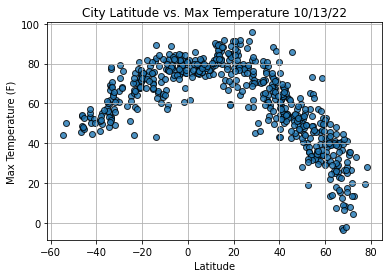

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

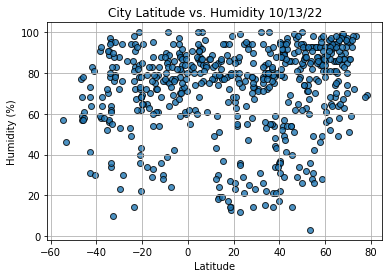

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

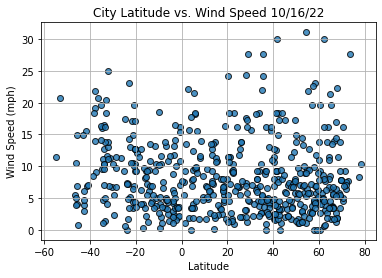

In [58]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [59]:
#creating a linear regression function (6.4.2)

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [46]:
index13 = city_data_df.loc[13]
index13

City                     Cherskiy
Lat                         68.75
Lng                         161.3
Max Temp                     8.49
Humidity                       90
Cloudiness                    100
Wind Speed                   5.82
Country                        RU
Date          2022-10-13 21:26:48
Name: 13, dtype: object

In [60]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Iqaluit,63.7506,-68.5145,26.33,86,40,13.80,CA,2022-10-13 21:26:45
2,Kapaa,22.0752,-159.3190,84.18,77,100,9.22,US,2022-10-13 21:26:46
3,Duzce,40.8389,31.1639,59.23,89,96,1.74,TR,2022-10-13 21:26:46
4,San Patricio,28.0170,-97.5169,95.72,58,85,7.34,US,2022-10-13 21:26:46
10,Hofn,64.2539,-15.2082,41.40,68,100,11.45,IS,2022-10-13 21:26:48
...,...,...,...,...,...,...,...,...,...
555,Dhidhdhoo,6.8833,73.1000,79.88,81,100,15.59,MV,2022-10-13 21:41:57
556,Tashla,51.7716,52.7427,49.21,88,99,8.93,RU,2022-10-13 21:41:57
558,Vestmanna,62.1564,-7.1664,43.72,81,100,4.61,FO,2022-10-13 21:41:58
559,Naze,28.3667,129.4833,76.12,85,58,24.38,JP,2022-10-13 21:41:31


In [61]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Iqaluit,63.7506,-68.5145,26.33,86,40,13.80,CA,2022-10-13 21:26:45
2,Kapaa,22.0752,-159.3190,84.18,77,100,9.22,US,2022-10-13 21:26:46
3,Duzce,40.8389,31.1639,59.23,89,96,1.74,TR,2022-10-13 21:26:46
4,San Patricio,28.0170,-97.5169,95.72,58,85,7.34,US,2022-10-13 21:26:46
10,Hofn,64.2539,-15.2082,41.40,68,100,11.45,IS,2022-10-13 21:26:48


In [62]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

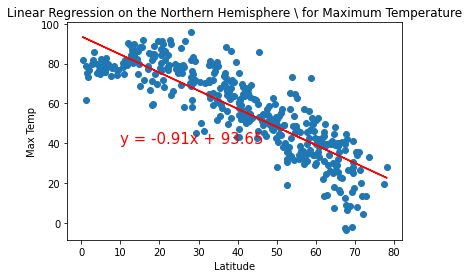

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp',(10,40))

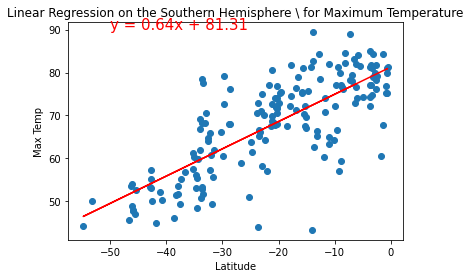

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp',(-50,90))

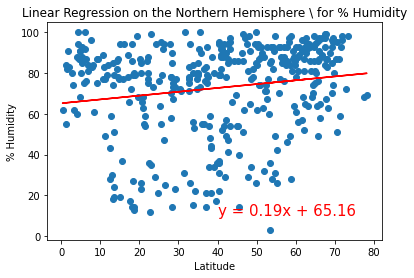

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity',(40,10))

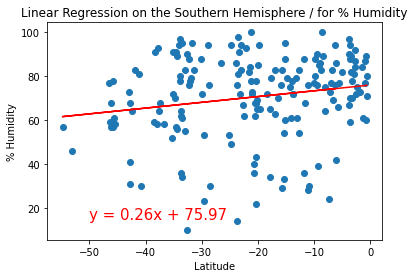

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere / for % Humidity', '% Humidity',(-50,15))


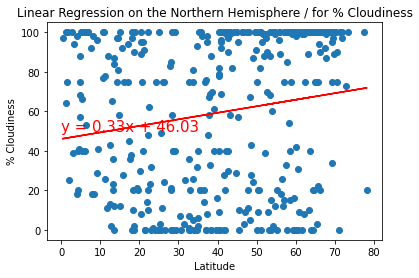

In [80]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere / for % Cloudiness', '% Cloudiness',(0,50))


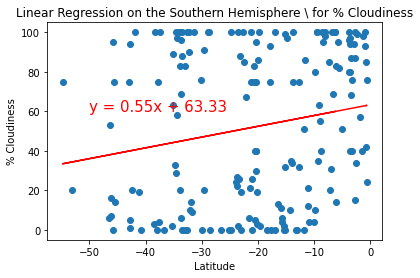

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for % Cloudiness', '% Cloudiness',(-50,60))

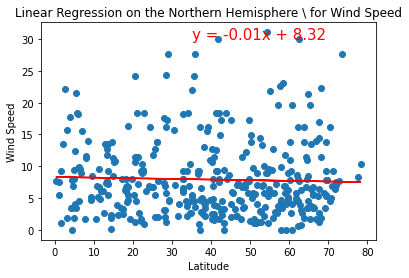

In [89]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for Wind Speed', 'Wind Speed',(35,30))


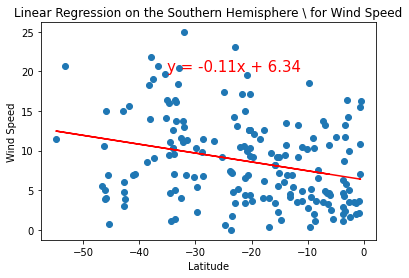

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for Wind Speed', 'Wind Speed',(-35,20))
